In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [137]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGRA2BGR)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

In [138]:
def edge_mask(img, line_size, blur_value):
    """
        input: Gray Scale Image
        Output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, line_size, blur_value)
    return edges

In [139]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1,3))

    criteria = ( cv2. TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    ret, label, center = cv2.kmeans(data, k , None, criteria, 10 , cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

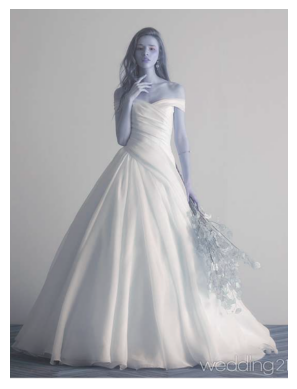

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/median_blur.dispatch.cpp:285: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'medianBlur'


In [140]:
filename = 'test3.png'
line_size, blur_value = 9,8
img = read_file(filename)
edges = edge_mask(img, line_size, blur_value)


plt.imshow(edges, cmap='binary')
plt.show()

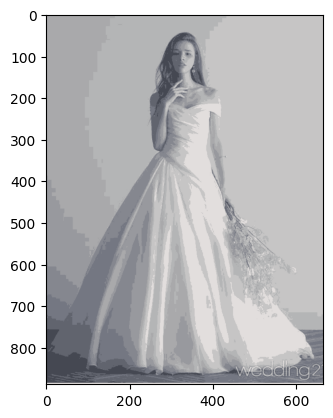

In [ ]:

img = color_quantization(img, k=9)
plt.imshow(img)
plt.show()

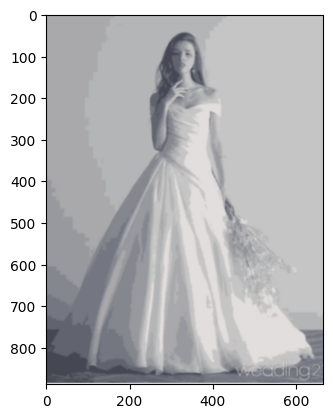

In [ ]:
blurred = cv2.bilateralFilter(img, d= 7, sigmaColor= 200, sigmaSpace= 200 )

plt.imshow(blurred)
plt.show()

In [ ]:
def cartoon(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask= edges)
    plt.imshow(c)
    plt.show()

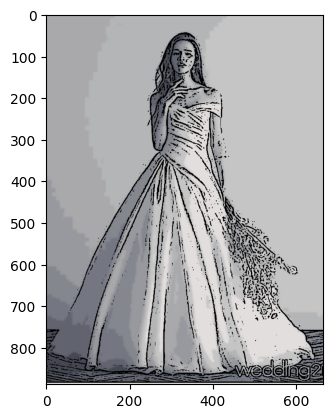

In [ ]:
cartoon(blurred)